In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import time
import re
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from matplotlib.ticker import MaxNLocator
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima.utils import ndiffs
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def rmsse (forecast,past, true, name):
    '''
    forecast: 28 steps ahead prediction
    true: oberved value for the predictions 
    if name == val:
       past: the past 1885 values 
    if name == test:
       past: the past 1913 values
    '''
    numerator = np.sum(np.square(forecast - true))
    numerator = numerator/28
    if name == 'val':
        denominator = np.sum(np.square(past[1:] - past[:-1]))/1884
    if name == 'test':
        denominator = np.sum(np.square(past[1:] - past[:-1]))/1912
    rmsse = numerator/denominator
    return np.sqrt(rmsse)

# data prep

In [ ]:
#'FOODS_3_035'   // 89 // 99


# this is foods-3-099
original_df = dat[dat['item_id'] == 'FOODS_3_099']

In [ ]:
df = original_df.iloc[:,4:]

In [ ]:
df

,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
2323,CA_1,CA,0,0,0,0,0,0,0,0,...,9,17,15,16,16,5,13,14,25,27
5372,CA_2,CA,0,0,0,0,0,0,0,0,...,3,11,11,3,4,3,5,12,10,7
8421,CA_3,CA,0,0,0,0,0,0,0,0,...,13,9,9,10,9,11,11,9,8,14
11470,CA_4,CA,0,0,0,0,0,0,0,0,...,3,14,7,10,9,7,7,9,7,16
14519,TX_1,TX,0,0,0,0,0,0,0,0,...,6,13,9,3,12,8,5,3,7,11
17568,TX_2,TX,0,0,0,0,0,0,0,0,...,12,16,28,16,21,18,13,16,22,16
20617,TX_3,TX,0,0,0,0,0,0,0,0,...,12,7,13,15,10,9,8,4,5,16
23666,WI_1,WI,0,0,0,0,0,0,0,0,...,5,7,7,2,7,4,5,5,15,7
26715,WI_2,WI,0,0,0,0,0,0,0,0,...,8,28,11,12,7,9,4,4,11,9
29764,WI_3,WI,0,0,0,0,0,0,0,0,...,11,12,15,9,5,7,8,8,8,11


In [ ]:
train_val = df.iloc[:,:1915]
train_val

,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
2323,CA_1,CA,0,0,0,0,0,0,0,0,...,13,20,26,17,11,16,5,15,14,20
5372,CA_2,CA,0,0,0,0,0,0,0,0,...,1,4,9,4,8,8,6,7,9,4
8421,CA_3,CA,0,0,0,0,0,0,0,0,...,12,11,18,11,12,8,10,11,8,8
11470,CA_4,CA,0,0,0,0,0,0,0,0,...,5,10,9,7,4,7,2,3,17,17
14519,TX_1,TX,0,0,0,0,0,0,0,0,...,10,7,13,12,8,12,6,6,11,16
17568,TX_2,TX,0,0,0,0,0,0,0,0,...,10,16,21,15,14,13,9,17,19,17
20617,TX_3,TX,0,0,0,0,0,0,0,0,...,8,3,13,13,16,8,3,8,5,12
23666,WI_1,WI,0,0,0,0,0,0,0,0,...,6,13,4,7,5,10,6,13,5,11
26715,WI_2,WI,0,0,0,0,0,0,0,0,...,13,9,10,4,14,7,9,15,8,12
29764,WI_3,WI,0,0,0,0,0,0,0,0,...,8,9,11,4,12,7,10,4,8,11


In [ ]:
train = df.iloc[:,:1887]
train
#train.to_csv('food99_train.csv') 

,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885
2323,CA_1,CA,0,0,0,0,0,0,0,0,...,18,21,25,18,11,19,6,17,14,18
5372,CA_2,CA,0,0,0,0,0,0,0,0,...,2,3,5,6,5,8,11,10,6,12
8421,CA_3,CA,0,0,0,0,0,0,0,0,...,11,11,15,16,9,17,4,7,13,11
11470,CA_4,CA,0,0,0,0,0,0,0,0,...,9,9,15,14,5,1,9,8,12,8
14519,TX_1,TX,0,0,0,0,0,0,0,0,...,15,10,13,8,10,5,6,17,10,8
17568,TX_2,TX,0,0,0,0,0,0,0,0,...,17,13,16,23,19,18,13,25,18,27
20617,TX_3,TX,0,0,0,0,0,0,0,0,...,5,7,7,7,1,11,8,9,3,3
23666,WI_1,WI,0,0,0,0,0,0,0,0,...,7,14,8,6,9,5,1,11,5,7
26715,WI_2,WI,0,0,0,0,0,0,0,0,...,10,19,12,15,13,15,8,13,4,11
29764,WI_3,WI,0,0,0,0,0,0,0,0,...,15,13,13,6,3,3,7,13,21,6


In [ ]:
tttt = pd.read_csv('/Users/shengshiyuan/Desktop/food99_test.csv')
tttt

,Unnamed: 0,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,2323,11,14,22,7,14,20,23,10,0,...,9,17,15,16,16,5,13,14,25,27
1,5372,0,0,5,3,10,11,12,3,5,...,3,11,11,3,4,3,5,12,10,7
2,8421,12,8,13,16,9,14,1,12,0,...,13,9,9,10,9,11,11,9,8,14
3,11470,8,8,8,9,8,19,11,10,11,...,3,14,7,10,9,7,7,9,7,16
4,14519,10,5,5,8,10,7,16,9,10,...,6,13,9,3,12,8,5,3,7,11
5,17568,23,16,17,19,13,19,16,13,20,...,12,16,28,16,21,18,13,16,22,16
6,20617,8,12,6,6,9,7,6,10,10,...,12,7,13,15,10,9,8,4,5,16
7,23666,7,4,7,7,11,9,11,10,5,...,5,7,7,2,7,4,5,5,15,7
8,26715,17,10,9,7,16,7,10,18,14,...,8,28,11,12,7,9,4,4,11,9
9,29764,8,14,11,7,3,12,11,6,5,...,11,12,15,9,5,7,8,8,8,11


In [ ]:
validation = df.iloc[:, 1887:1915]
#validation.to_csv('food99_val.csv') 
validation

,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
2323,18,19,12,13,12,24,8,15,23,16,...,13,20,26,17,11,16,5,15,14,20
5372,9,17,7,4,7,12,10,3,5,7,...,1,4,9,4,8,8,6,7,9,4
8421,9,6,10,9,10,11,16,9,9,11,...,12,11,18,11,12,8,10,11,8,8
11470,10,13,7,10,8,10,1,6,9,4,...,5,10,9,7,4,7,2,3,17,17
14519,9,3,5,6,7,8,12,6,10,13,...,10,7,13,12,8,12,6,6,11,16
17568,13,18,8,17,9,12,25,15,10,15,...,10,16,21,15,14,13,9,17,19,17
20617,8,6,12,7,10,5,12,15,10,6,...,8,3,13,13,16,8,3,8,5,12
23666,6,3,8,9,7,12,14,5,7,9,...,6,13,4,7,5,10,6,13,5,11
26715,11,9,8,8,14,11,11,15,14,12,...,13,9,10,4,14,7,9,15,8,12
29764,15,10,7,9,13,10,1,13,15,12,...,8,9,11,4,12,7,10,4,8,11


In [ ]:
test = df.iloc[:, 1915:]
#test.to_csv('food99_test.csv') 
test

,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
2323,11,14,22,7,14,20,23,10,0,18,...,9,17,15,16,16,5,13,14,25,27
5372,0,0,5,3,10,11,12,3,5,11,...,3,11,11,3,4,3,5,12,10,7
8421,12,8,13,16,9,14,1,12,0,11,...,13,9,9,10,9,11,11,9,8,14
11470,8,8,8,9,8,19,11,10,11,7,...,3,14,7,10,9,7,7,9,7,16
14519,10,5,5,8,10,7,16,9,10,5,...,6,13,9,3,12,8,5,3,7,11
17568,23,16,17,19,13,19,16,13,20,14,...,12,16,28,16,21,18,13,16,22,16
20617,8,12,6,6,9,7,6,10,10,10,...,12,7,13,15,10,9,8,4,5,16
23666,7,4,7,7,11,9,11,10,5,4,...,5,7,7,2,7,4,5,5,15,7
26715,17,10,9,7,16,7,10,18,14,10,...,8,28,11,12,7,9,4,4,11,9
29764,8,14,11,7,3,12,11,6,5,5,...,11,12,15,9,5,7,8,8,8,11


# seasonal naive 

In [ ]:
def snaive(train,seasonal_periods = 7,forecast_horizon = 28):
    '''
    fcast: seasonal naive forecast
    seasonal period = 7 since our data is daily 
    Forecast_horizon = 28
    '''
        
    last_season=train.iloc[-seasonal_periods:]     
    reps= int(forecast_horizon/seasonal_periods)    
    fcast=np.tile(last_season,reps)
    
    return fcast

In [ ]:
rmsse_sn = []
for i in range(10):
    snaive_forecast = snaive(train_val.iloc[i,:],seasonal_periods = 7, forecast_horizon = 28) 
    rmsse_sn.append( rmsse(snaive_forecast, train_val.iloc[i,2:].values, test.iloc[i,:].values, 'test'))

In [ ]:
np.sum(rmsse_val)/10

0.8790161987113354

In [ ]:
np.mean(rmsse_val[7:])

1.0678969450573847

# ARIMA

## model 1

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
result = adfuller(train_val.iloc[0,2:].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# the series is stationary

ADF Statistic: -7.005015
p-value: 0.000000


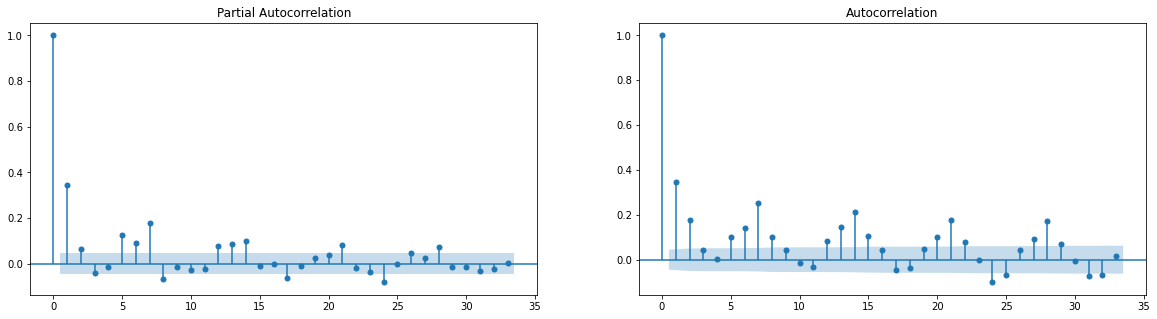

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

plot_pacf(train_val.iloc[0,2:].values, ax=axes[0])
plot_acf(train_val.iloc[0,2:].values, ax=axes[1])
plt.show()
# spikes at lag 7,14...
# a possible model 
# arima(p = 2, d = 0, q = 3)
# seasonal arima(p =1, d = 0, q =1) m =7

In [ ]:
# stepwise search to minimize aic
model = pm.auto_arima(train_val.iloc[0,2:], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, 
                      seasonal=True, 
                      m = 7,
                      start_P=0, 
                      start_Q = 0,
                      max_P = 5, max_Q = 5,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=13347.711, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=13004.636, Time=0.95 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=13067.659, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=16710.669, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=13104.287, Time=0.25 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=12975.416, Time=2.09 sec
 ARIMA(1,0,0)(3,0,0)[7] intercept   : AIC=12957.681, Time=6.18 sec
 ARIMA(1,0,0)(4,0,0)[7] intercept   : AIC=12943.959, Time=12.18 sec
 ARIMA(1,0,0)(5,0,0)[7] intercept   : AIC=12940.691, Time=15.51 sec
 ARIMA(1,0,0)(5,0,1)[7] intercept   : AIC=12942.494, Time=20.82 sec
 ARIMA(1,0,0)(4,0,1)[7] intercept   : AIC=12935.458, Time=12.64 sec
 ARIMA(1,0,0)(3,0,1)[7] intercept   : AIC=12934.380, Time=6.80 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=12919.579, Time=5.12 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=12915.820, Time=2.41 sec
 ARIMA(1,0,0)(0

In [ ]:
model = pm.ARIMA( order = (1,0,0), seasonal_order= (1,0,3,7))
model_fit = model.fit(train_val.iloc[0,2:])
forecasts = model_fit.predict(28)
rmsse1= rmsse(forecasts, train_val.iloc[0,2:].values, test.iloc[0,:].values, 'test')

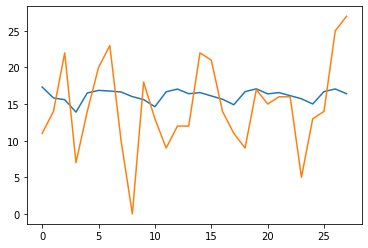

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[0,:])

In [ ]:
rmsse1

0.6723296427255615

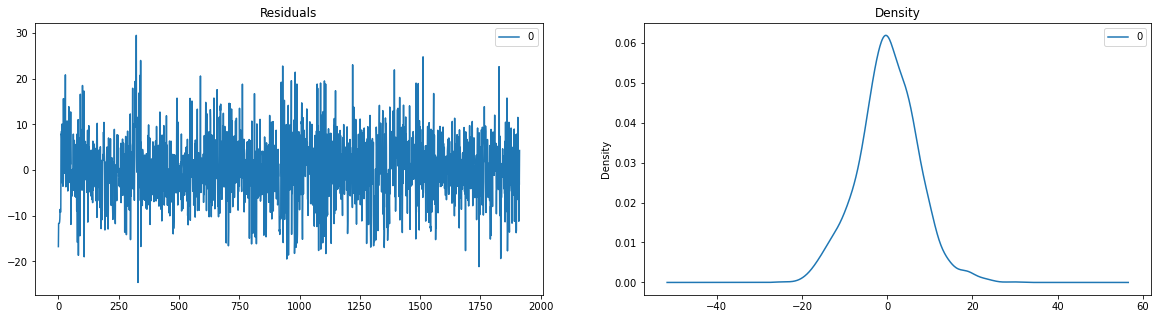

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid() )
fig, ax = plt.subplots(1,2,figsize =(20,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

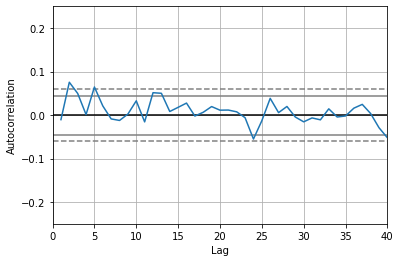

In [ ]:
autocorrelation_plot(residuals)
plt.xlim(0,40)
plt.ylim(-0.25,.25)
plt.show()
# positive autocorrelation at lag 2 that seems significant.

In [ ]:
# rebuild the model
model = pm.ARIMA( order = (1,0,1), seasonal_order= (1,0,3,7))
model_fit = model.fit(train_val.iloc[0,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse1= rmsse(forecasts, train_val.iloc[0,2:].values, test.iloc[0,:].values, 'test')

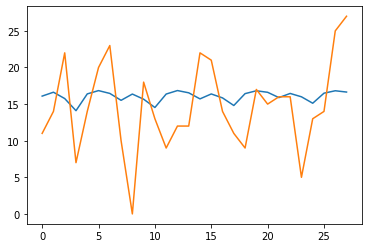

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[0,:])

In [ ]:
rmsse1

0.6701945386021813

In [ ]:
sm.stats.acorr_ljungbox(residuals,lags=20, return_df=True)
# ljungbox test comfirms that the residuals are independent 

,lb_stat,lb_pvalue
1,0.162802,0.686590
2,0.926308,0.629296
3,1.370986,0.712350
4,4.271393,0.370521
5,7.901828,0.161730
6,8.550131,0.200503
7,8.573361,0.284754
8,9.415992,0.308427
9,9.574121,0.386049
10,10.232472,0.420340


# model 2

In [ ]:
result = adfuller(train_val.iloc[1,2:].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# adf test suggests that the series is stationary

ADF Statistic: -4.673444
p-value: 0.000094


In [ ]:
ndiffs(train_val.iloc[1,2:].values, test='kpss')
#kpss test suggests that the data needs first order differencing

1

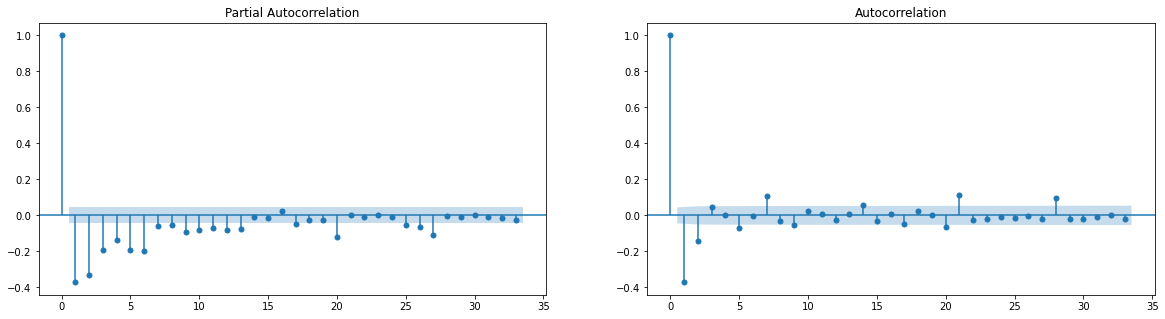

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

plot_pacf(np.diff(train_val.iloc[1,2:].values), ax=axes[0])
plot_acf(np.diff(train_val.iloc[1,2:].values), ax=axes[1])
plt.show()

In [ ]:
# stepwise search to minimize aic
model = pm.auto_arima(train_val.iloc[1,2:], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=5, 
                      seasonal=True, 
                      m = 7,
                      start_P=0, 
                      start_Q = 0,
                      max_P = 10, max_Q = 5,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


In [ ]:
model

ARIMA(order=(4, 0, 0), scoring_args={}, seasonal_order=(3, 0, 1, 7),
      suppress_warnings=True)

In [ ]:
model = pm.ARIMA( order = (4,0,0), seasonal_order= (3,0,1,7))
model_fit = model.fit(train_val.iloc[1,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse2= rmsse(forecasts, train_val.iloc[1,2:].values, test.iloc[1,:].values, 'test')

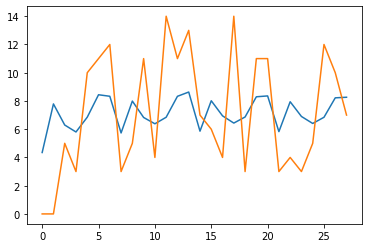

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[1,:])

In [ ]:
train

,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885
2323,CA_1,CA,0,0,0,0,0,0,0,0,...,18,21,25,18,11,19,6,17,14,18
5372,CA_2,CA,0,0,0,0,0,0,0,0,...,2,3,5,6,5,8,11,10,6,12
8421,CA_3,CA,0,0,0,0,0,0,0,0,...,11,11,15,16,9,17,4,7,13,11
11470,CA_4,CA,0,0,0,0,0,0,0,0,...,9,9,15,14,5,1,9,8,12,8
14519,TX_1,TX,0,0,0,0,0,0,0,0,...,15,10,13,8,10,5,6,17,10,8
17568,TX_2,TX,0,0,0,0,0,0,0,0,...,17,13,16,23,19,18,13,25,18,27
20617,TX_3,TX,0,0,0,0,0,0,0,0,...,5,7,7,7,1,11,8,9,3,3
23666,WI_1,WI,0,0,0,0,0,0,0,0,...,7,14,8,6,9,5,1,11,5,7
26715,WI_2,WI,0,0,0,0,0,0,0,0,...,10,19,12,15,13,15,8,13,4,11
29764,WI_3,WI,0,0,0,0,0,0,0,0,...,15,13,13,6,3,3,7,13,21,6


In [ ]:
rmsse2

1.0522879153181912

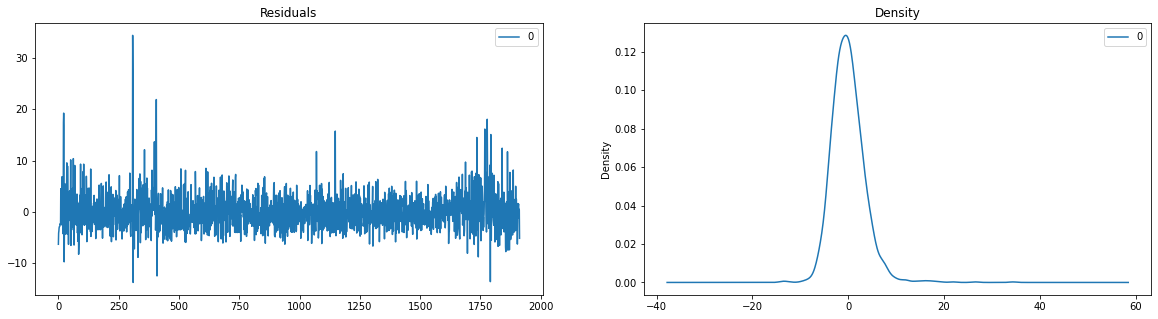

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid() )
fig, ax = plt.subplots(1,2,figsize =(20,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

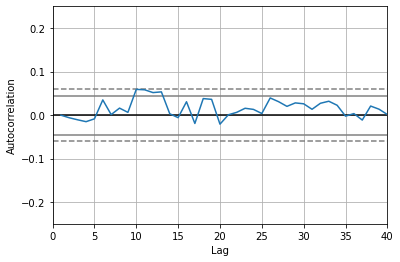

In [ ]:
autocorrelation_plot(residuals)
plt.xlim(0,40)
plt.ylim(-0.25,.25)
plt.show()

# model 3

In [ ]:
result = adfuller(train_val.iloc[2,2:].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# adf test suggests that the series is stationary

ADF Statistic: -4.719894
p-value: 0.000077


In [ ]:
ndiffs(train_val.iloc[2,2:].values, test='kpss')
#kpss test suggests that the data needs first order differencing

1

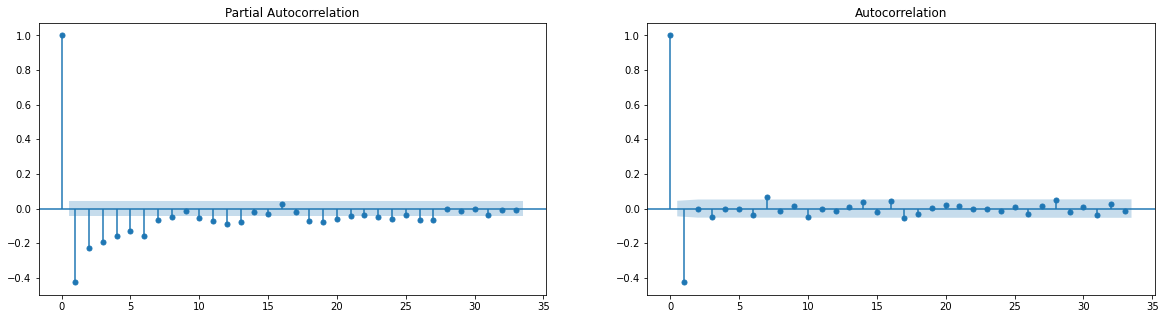

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

plot_pacf(np.diff(train_val.iloc[2,2:].values), ax=axes[0])
plot_acf(np.diff(train_val.iloc[2,2:].values), ax=axes[1])
plt.show()
# spikes at lag 7,14...

In [ ]:
# stepwise search to minimize aic
model = pm.auto_arima(train_val.iloc[2,2:], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=5, 
                      seasonal=True, 
                      m = 7,
                      start_P=0, 
                      start_Q = 0,
                      max_P = 10, max_Q = 5,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


In [ ]:
model

ARIMA(order=(5, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [ ]:
model = pm.ARIMA( order = (5,0,0), seasonal_order= (1,0,1,7))
model_fit = model.fit(train_val.iloc[2,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse3= rmsse(forecasts, train_val.iloc[2,2:].values, test.iloc[2,:].values, 'test')

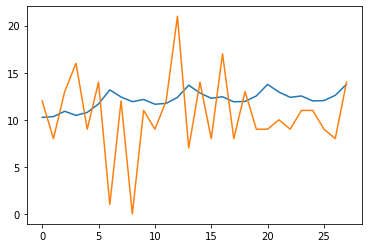

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[2,:])

In [ ]:
rmsse3

0.6638843615737798

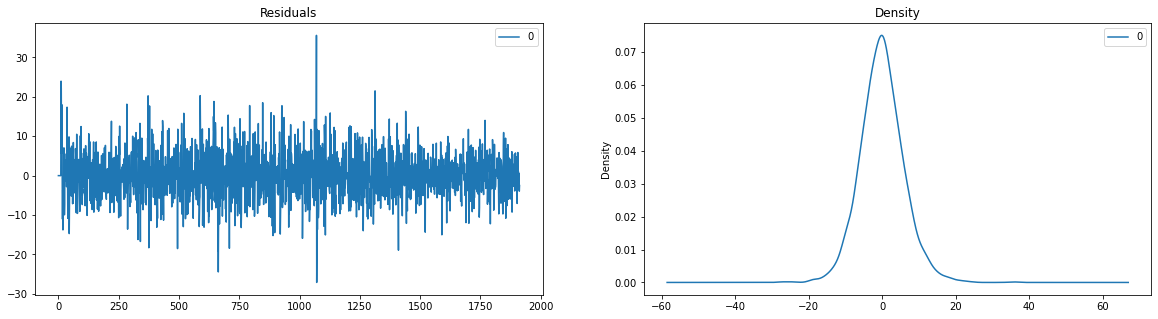

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid() )
fig, ax = plt.subplots(1,2,figsize =(20,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

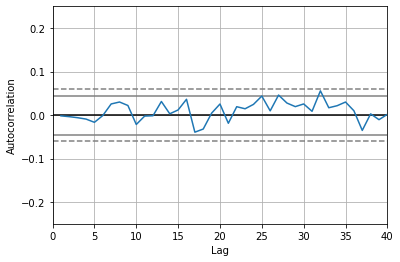

In [ ]:
autocorrelation_plot(residuals)
plt.xlim(0,40)
plt.ylim(-0.25,.25)
plt.show()

# model 4

In [ ]:
result = adfuller(train_val.iloc[3,2:].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# adf test suggests that the series is stationary

ADF Statistic: -4.925989
p-value: 0.000031


In [ ]:
ndiffs(train_val.iloc[3,2:].values, test='kpss')
#kpss test suggests that the data is stationary

0

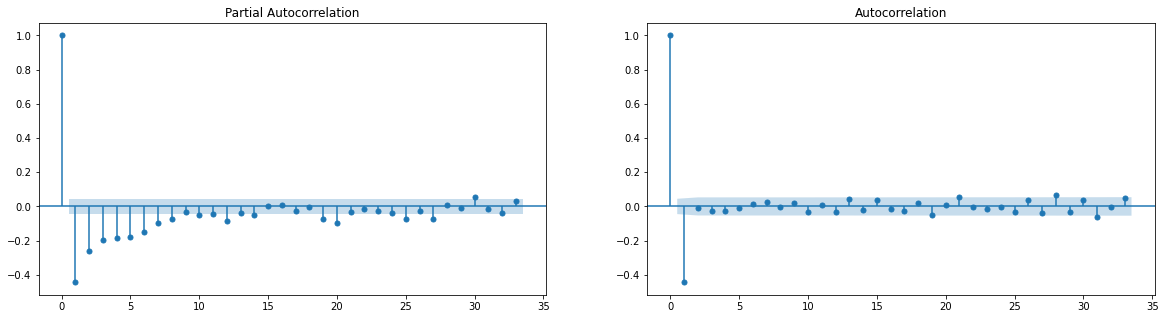

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

plot_pacf(np.diff(train_val.iloc[3,2:].values), ax=axes[0])
plot_acf(np.diff(train_val.iloc[3,2:].values), ax=axes[1])
plt.show()
# spikes at lag 7,14...

In [ ]:
# stepwise search to minimize aic
model = pm.auto_arima(train_val.iloc[3,2:], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=5, 
                      seasonal=True, 
                      m = 7,
                      start_P=0, 
                      start_Q = 0,
                      max_P = 10, max_Q = 5,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


In [ ]:
model

ARIMA(order=(6, 0, 1), scoring_args={}, seasonal_order=(3, 0, 1, 7),
      suppress_warnings=True)

In [ ]:
model = pm.ARIMA( order = (6,0,1), seasonal_order= (3,0,1,7))
model_fit = model.fit(train_val.iloc[3,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse4= rmsse(forecasts, train_val.iloc[3,2:].values, test.iloc[3,:].values, 'test')

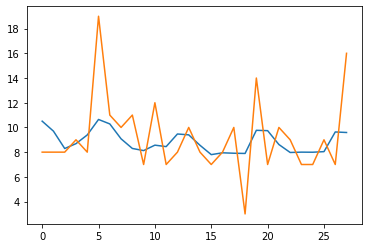

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[3,:])

In [ ]:
rmsse4

0.5995506265444818

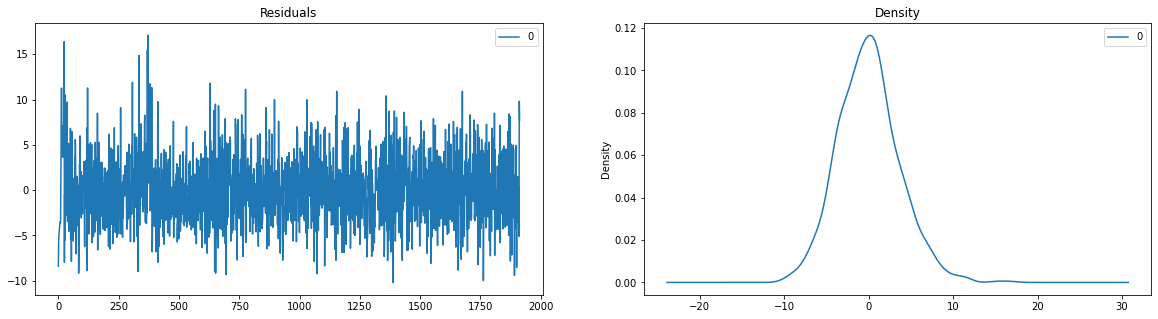

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid() )
fig, ax = plt.subplots(1,2,figsize =(20,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

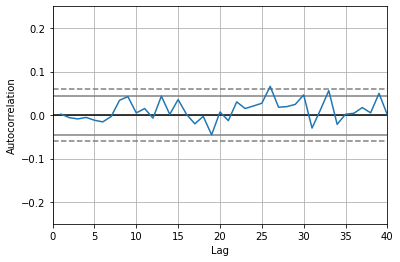

In [ ]:
autocorrelation_plot(residuals)
plt.xlim(0,40)
plt.ylim(-0.25,.25)
plt.show()

# model 5

In [ ]:
result = adfuller(train_val.iloc[4,2:].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# adf test suggests that the series is stationary

ADF Statistic: -5.454776
p-value: 0.000003


In [ ]:
ndiffs(train_val.iloc[4,2:].values, test='kpss')
#kpss test suggests that the data needs first order differencing

1

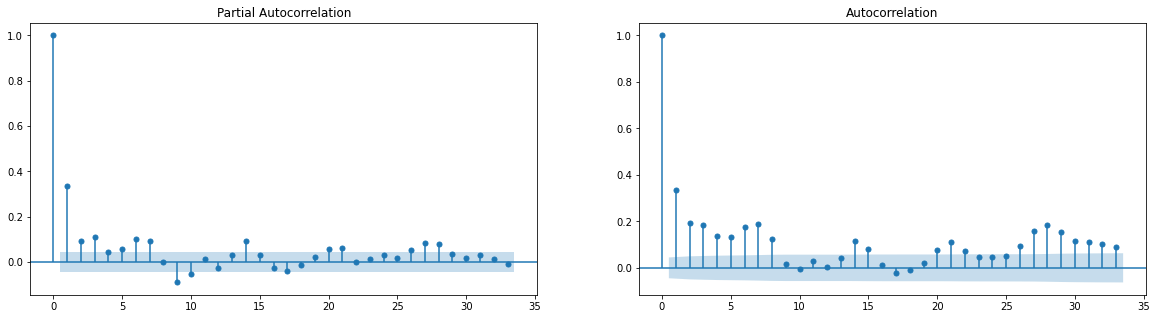

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

plot_pacf(train_val.iloc[4,2:].values, ax=axes[0])
plot_acf(train_val.iloc[4,2:].values, ax=axes[1])
plt.show()
# spikes at lag 7,14...

In [ ]:
# stepwise search to minimize aic
model = pm.auto_arima(train_val.iloc[4,2:], start_p=0, start_q=0,
                      test='adf',       
                      max_p=10, max_q=5, 
                      seasonal=True, 
                      m = 7,
                      start_P=0, 
                      start_Q = 0,
                      max_P = 10, max_Q = 5,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


In [ ]:
model

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [ ]:
model = pm.ARIMA( order = (1,0,1), seasonal_order= (1,0,1,7))
model_fit = model.fit(train_val.iloc[4,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse5= rmsse(forecasts, train_val.iloc[4,2:].values, test.iloc[4,:].values, 'test')

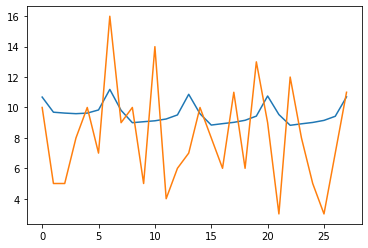

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[4,:])

In [ ]:
rmsse5

0.620400387388815

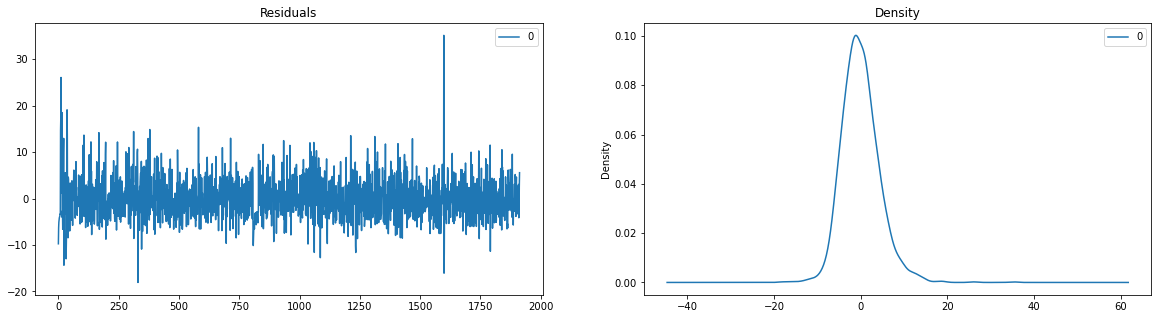

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid() )
fig, ax = plt.subplots(1,2,figsize =(20,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

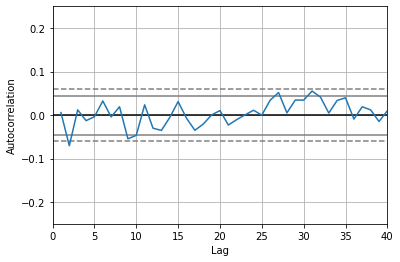

In [ ]:
autocorrelation_plot(residuals)
plt.xlim(0,40)
plt.ylim(-0.25,.25)
plt.show()

In [ ]:
#rebuild the model
model = pm.ARIMA( order = (1,0,1), seasonal_order= (2,0,1,7))
model_fit = model.fit(train_val.iloc[4,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse5= rmsse(forecasts, train_val.iloc[4,2:].values, test.iloc[4,:].values, 'test')

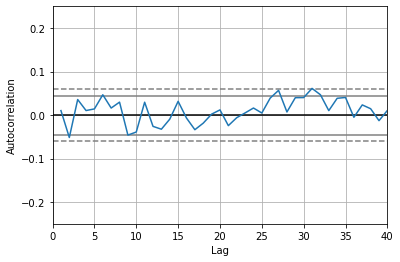

In [ ]:
autocorrelation_plot(residuals)
plt.xlim(0,40)
plt.ylim(-0.25,.25)
plt.show()

In [ ]:
rmsse5

0.6072320650849147

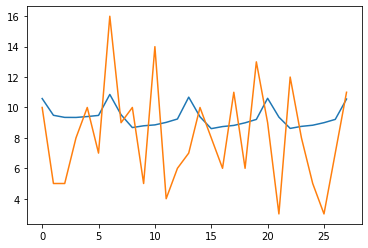

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[4,:])

# model 6

In [ ]:
result = adfuller(train_val.iloc[5,2:].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# adf test suggests that the series is stationary

ADF Statistic: -3.690910
p-value: 0.004243


In [ ]:
ndiffs(train_val.iloc[5,2:].values, test='kpss')
#kpss test suggests that the data needs first order differencing

1

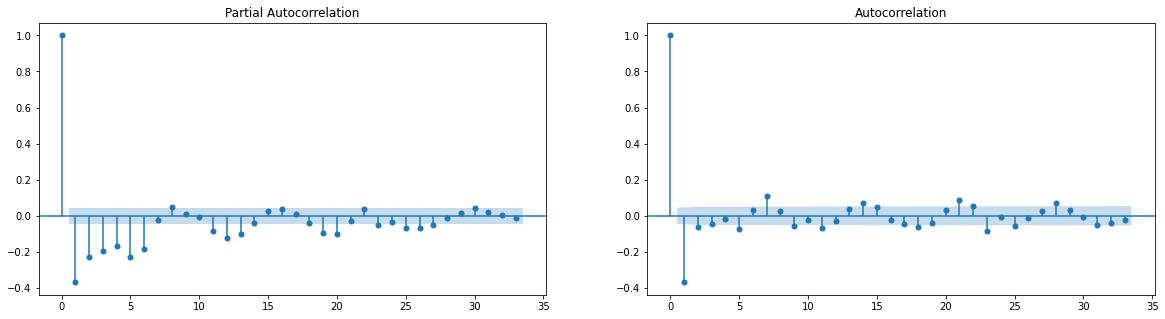

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

plot_pacf(np.diff(train_val.iloc[5,2:].values), ax=axes[0])
plot_acf(np.diff(train_val.iloc[5,2:].values), ax=axes[1])
plt.show()
# spikes at lag 7,14...

In [ ]:
# stepwise search to minimize aic
model = pm.auto_arima(train_val.iloc[5,2:], start_p=0, start_q=0,
                      test='kpss',       
                      max_p=10, max_q=5, 
                      seasonal=True, 
                      m = 7,
                      start_P=0, 
                      start_Q = 0,
                      max_P = 10, max_Q = 5,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


In [ ]:
model

ARIMA(order=(5, 1, 3), scoring_args={}, seasonal_order=(1, 0, 5, 7),
      suppress_warnings=True)

In [ ]:
model = pm.ARIMA( order = (5,1,3), seasonal_order= (1,0,5,7))
model_fit = model.fit(train_val.iloc[5,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse6= rmsse(forecasts, train_val.iloc[5,2:].values, test.iloc[5,:].values, 'test')

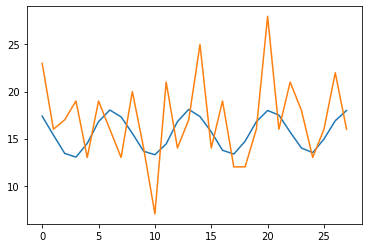

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[5,:])

In [ ]:
rmsse6

0.488803814099665

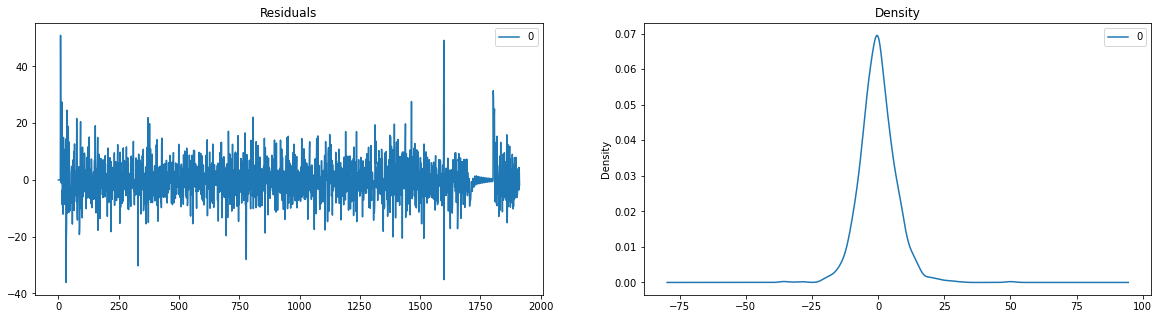

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid() )
fig, ax = plt.subplots(1,2,figsize =(20,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

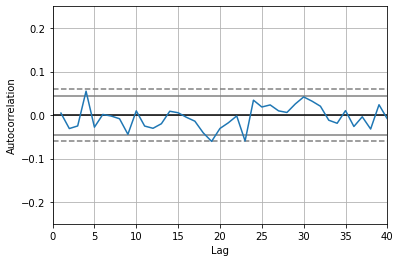

In [ ]:
autocorrelation_plot(residuals)
plt.xlim(0,40)
plt.ylim(-0.25,.25)
plt.show()

# model 7

In [ ]:
result = adfuller(train_val.iloc[6,2:].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# adf test suggests that the series is stationary

ADF Statistic: -3.753809
p-value: 0.003417


In [ ]:
ndiffs(train_val.iloc[6,2:].values, test='kpss')
#kpss test suggests that the data needs first order differencing

1

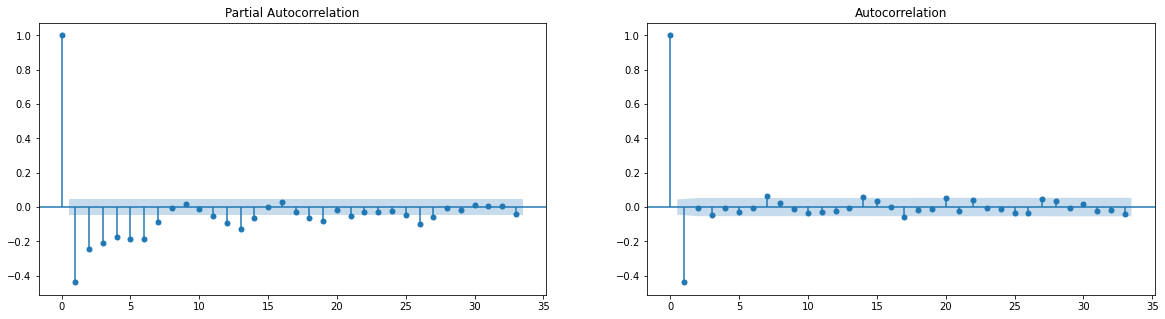

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

plot_pacf(np.diff(train_val.iloc[6,2:].values), ax=axes[0])
plot_acf(np.diff(train_val.iloc[6,2:].values), ax=axes[1])
plt.show()

In [ ]:
# stepwise search to minimize aic
model = pm.auto_arima(train_val.iloc[6,2:], start_p=0, start_q=0,
                      test='kpss',       
                      max_p=10, max_q=5, 
                      seasonal=True, 
                      m = 7,
                      start_P=0, 
                      start_Q = 0,
                      max_P = 10, max_Q = 5,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


In [ ]:
model

ARIMA(order=(6, 1, 3), scoring_args={}, seasonal_order=(0, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

In [ ]:
model = pm.ARIMA( order = (6,1,3), seasonal_order= (0,0,1,7))
model_fit = model.fit(train_val.iloc[6,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse7= rmsse(forecasts, train_val.iloc[6,2:].values, test.iloc[6,:].values, 'test')

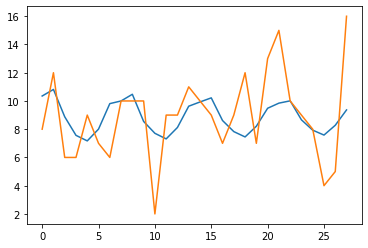

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[6,:])

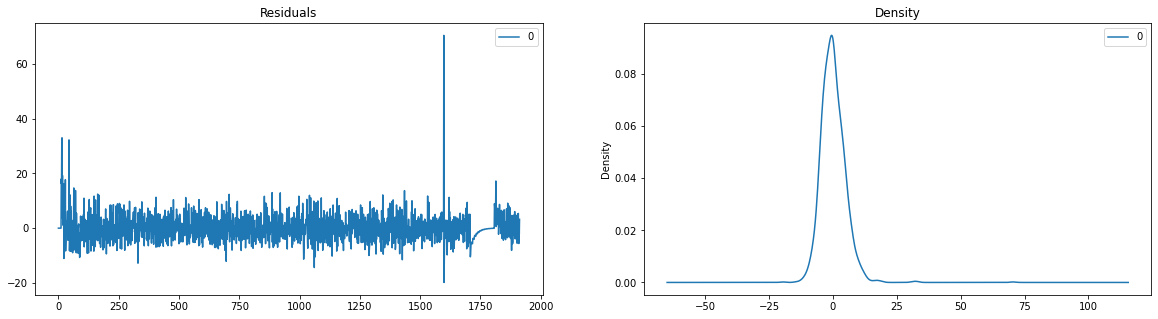

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid() )
fig, ax = plt.subplots(1,2,figsize =(20,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

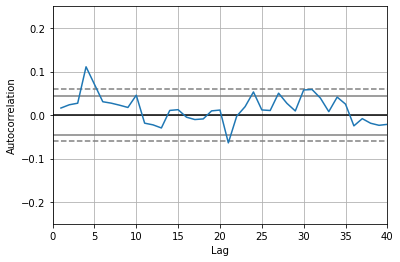

In [ ]:
autocorrelation_plot(residuals)
plt.xlim(0,40)
plt.ylim(-0.25,.25)
plt.show()

In [ ]:
# rebuild the model
model = pm.ARIMA( order = (6,1,4), seasonal_order= (0,0,1,7))
model_fit = model.fit(train_val.iloc[6,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse7= rmsse(forecasts, train_val.iloc[6,2:].values, test.iloc[6,:].values, 'test')

In [ ]:
rmsse7

0.467484929514602

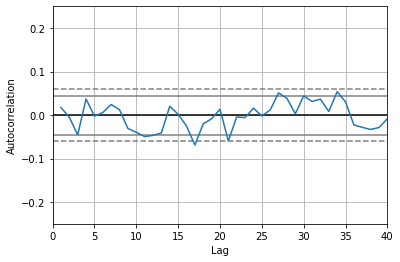

In [ ]:
autocorrelation_plot(residuals)
plt.xlim(0,40)
plt.ylim(-0.25,.25)
plt.show()

# model 8

In [ ]:
result = adfuller(train_val.iloc[7,2:].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# adf test suggests that the series is not stationary

ADF Statistic: -2.610201
p-value: 0.090907


In [ ]:
ndiffs(train_val.iloc[7,2:].values, test='kpss')
#kpss test suggests that the data needs first order differencing

1

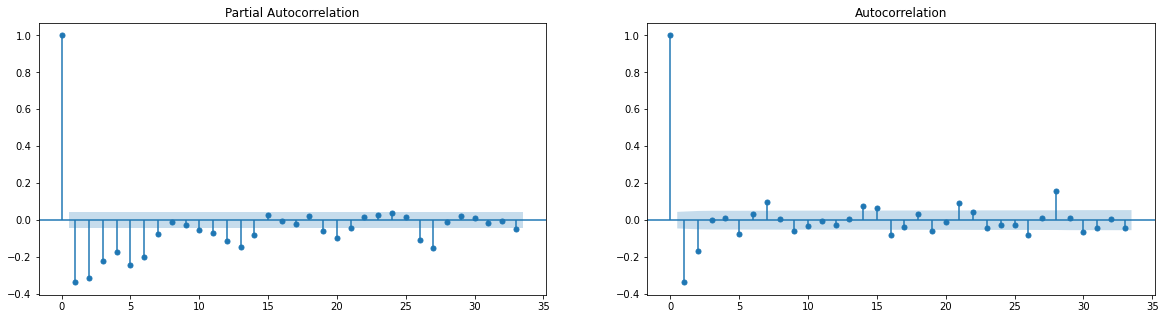

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

plot_pacf(np.diff(train_val.iloc[7,2:].values), ax=axes[0])
plot_acf(np.diff(train_val.iloc[7,2:].values), ax=axes[1])
plt.show()

In [ ]:
# stepwise search to minimize aic
model = pm.auto_arima(train_val.iloc[7,2:], start_p=0, start_q=0,
                      test='kpss',       
                      max_p=10, max_q=5, 
                      seasonal=True, 
                      m = 7,
                      start_P=0, 
                      start_Q = 0,
                      max_P = 10, max_Q = 5,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


In [ ]:
model

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(0, 0, 5, 7),
      suppress_warnings=True, with_intercept=False)

In [ ]:
model = pm.ARIMA( order = (3,1,1), seasonal_order= (0,0,5,7))
model_fit = model.fit(train_val.iloc[7,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse8= rmsse(forecasts, train_val.iloc[7,2:].values, test.iloc[7,:].values, 'test')

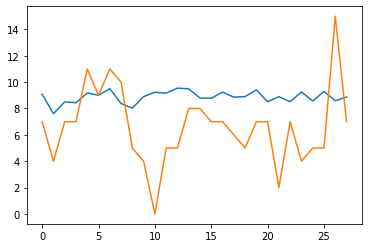

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[7,:])

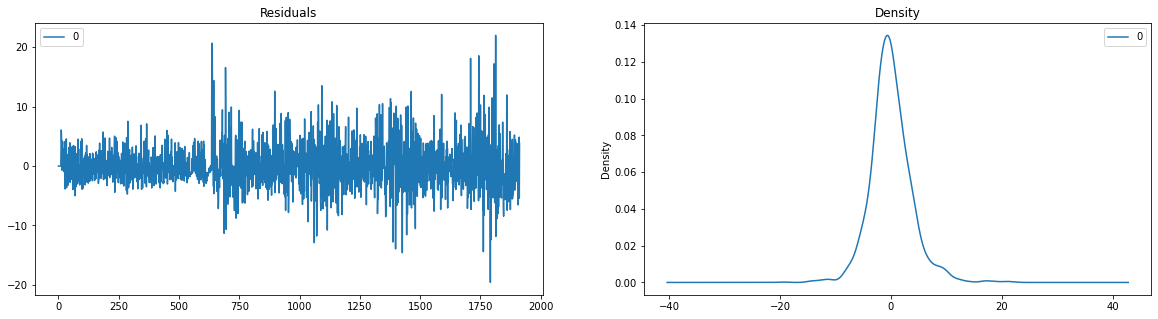

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid() )
fig, ax = plt.subplots(1,2,figsize =(20,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

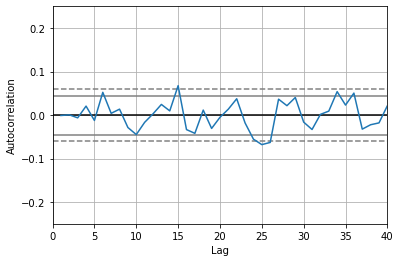

In [ ]:
autocorrelation_plot(residuals)
plt.xlim(0,40)
plt.ylim(-0.25,.25)
plt.show()

In [ ]:
#rebuild the model
model = pm.ARIMA( order = (3,1,1), seasonal_order= (1,0,5,7))
model_fit = model.fit(train_val.iloc[7,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse8= rmsse(forecasts, train_val.iloc[7,2:].values, test.iloc[7,:].values, 'test')

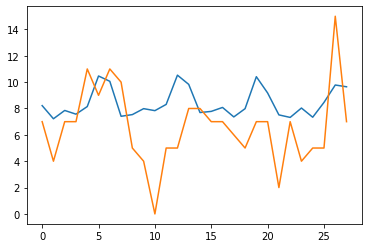

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[7,:])

In [ ]:
rmsse8

0.6742109041622841

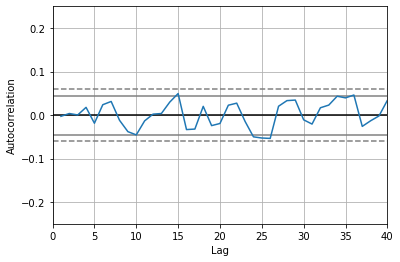

In [ ]:
autocorrelation_plot(residuals)
plt.xlim(0,40)
plt.ylim(-0.25,.25)
plt.show()

# model 9

In [ ]:
result = adfuller(train_val.iloc[8,2:].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# adf test suggests that the series is  stationary

ADF Statistic: -2.923686
p-value: 0.042662


In [ ]:
ndiffs(train_val.iloc[8,2:].values, test='kpss')
#kpss test suggests that the data needs first order differencing

1

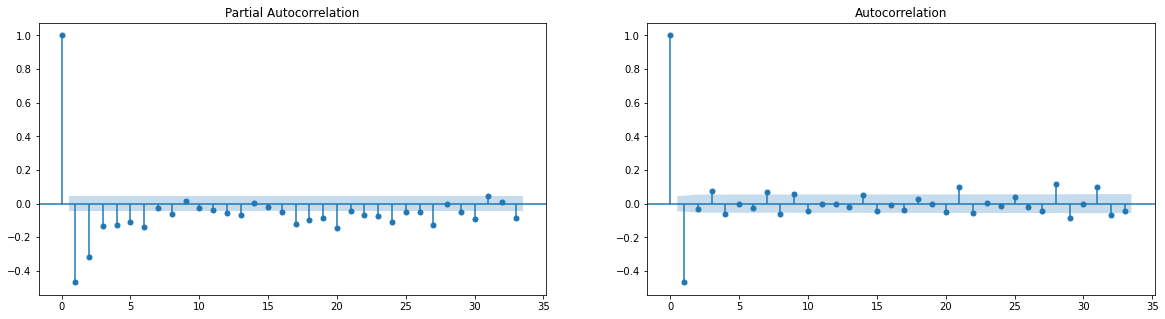

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

plot_pacf(np.diff(train_val.iloc[8,2:].values), ax=axes[0])
plot_acf(np.diff(train_val.iloc[8,2:].values), ax=axes[1])
plt.show()

In [ ]:
# stepwise search to minimize aic
model = pm.auto_arima(train_val.iloc[8,2:], start_p=0, start_q=0,
                      test='kpss',       
                      max_p=10, max_q=5, 
                      seasonal=True, 
                      m = 7,
                      start_P=0, 
                      start_Q = 0,
                      max_P = 10, max_Q = 5,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

In [ ]:
model

ARIMA(order=(3, 1, 1), seasonal_order=(3, 0, 1, 7))

In [ ]:
model = pm.ARIMA( order = (3,1,1), seasonal_order= (3,0,1,7))
model_fit = model.fit(train_val.iloc[8,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse9= rmsse(forecasts, train_val.iloc[8,2:].values, test.iloc[8,:].values, 'test')

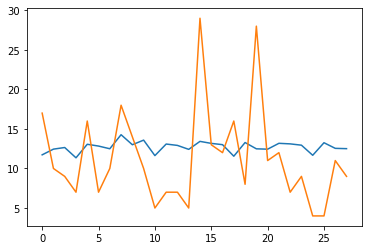

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[8,:])

In [ ]:
rmsse9

1.0703363647015205

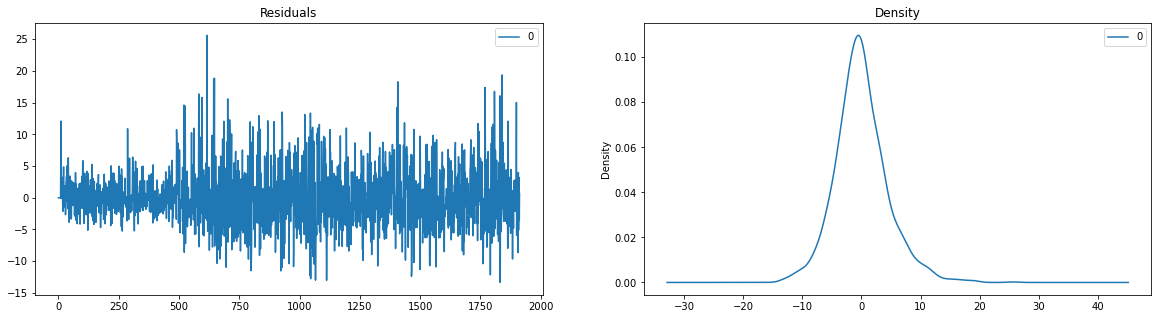

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid() )
fig, ax = plt.subplots(1,2,figsize =(20,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

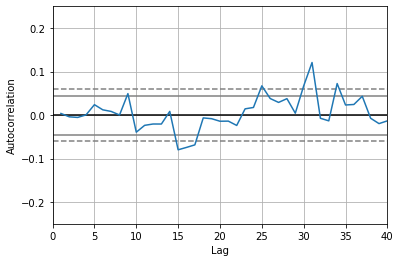

In [ ]:
autocorrelation_plot(residuals)
plt.xlim(0,40)
plt.ylim(-0.25,.25)
plt.show()

In [ ]:
#rebuild the model
model = pm.ARIMA( order = (6,0,2), seasonal_order= (4,0,2,7))
model_fit = model.fit(train_val.iloc[8,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse9= rmsse(forecasts, train_val.iloc[8,2:].values, test.iloc[8,:].values, 'test')

In [ ]:
rmsse9

1.0332126576629923

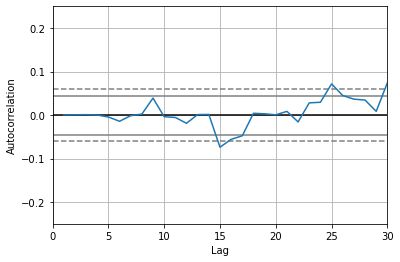

In [ ]:
autocorrelation_plot(residuals)
plt.xlim(0,30)
plt.ylim(-0.25,.25)
plt.show()

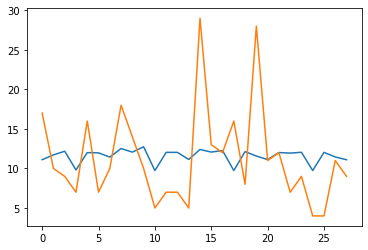

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[8,:])

# model 10

In [ ]:
result = adfuller(train_val.iloc[9,2:].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# adf test suggests that the series is stationary

ADF Statistic: -4.737468
p-value: 0.000072


In [ ]:
ndiffs(train_val.iloc[9,2:].values, test='kpss')
#kpss test suggests that the data needs first order differencing

1

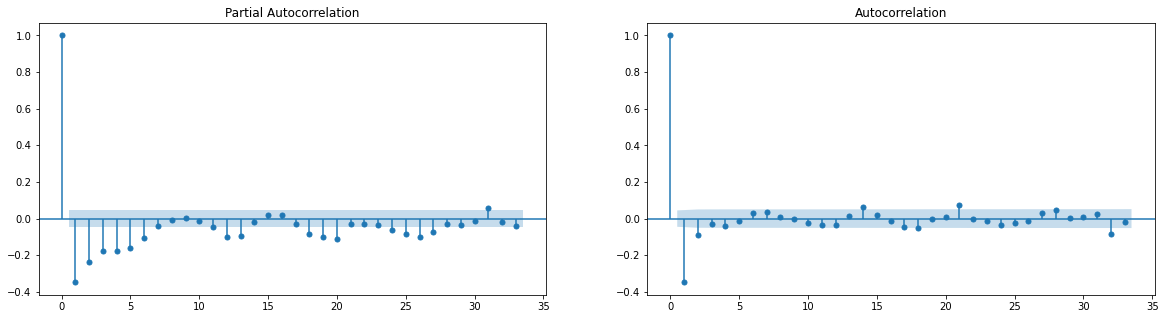

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

plot_pacf(np.diff(train_val.iloc[9,2:].values), ax=axes[0])
plot_acf(np.diff(train_val.iloc[9,2:].values), ax=axes[1])
plt.show()

In [ ]:
# stepwise search to minimize aic
model = pm.auto_arima(train_val.iloc[9,2:], start_p=0, start_q=0,
                      test='kpss',       
                      max_p=10, max_q=5, 
                      seasonal=True, 
                      m = 7,
                      start_P=0, 
                      start_Q = 0,
                      max_P = 10, max_Q = 5,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

In [ ]:
model

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(1, 0, 5, 7),
      suppress_warnings=True)

In [ ]:
model = pm.ARIMA( order = (1,1,2), seasonal_order= (1,0,5,7))
model_fit = model.fit(train_val.iloc[9,2:])
forecasts = model_fit.predict(28)
residuals = pd.DataFrame(model_fit.resid())
rmsse10= rmsse(forecasts, train_val.iloc[9,2:].values, test.iloc[9,:].values, 'test')

In [ ]:
rmsse10

0.5785334776520705

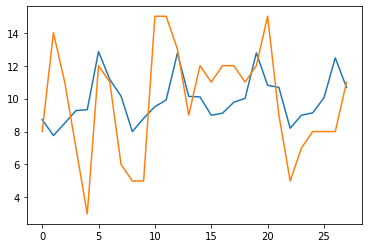

In [ ]:
plt.plot(np.arange(0,len(forecasts),1), forecasts)
plt.plot(np.arange(0,len(forecasts),1), test.iloc[9,:])

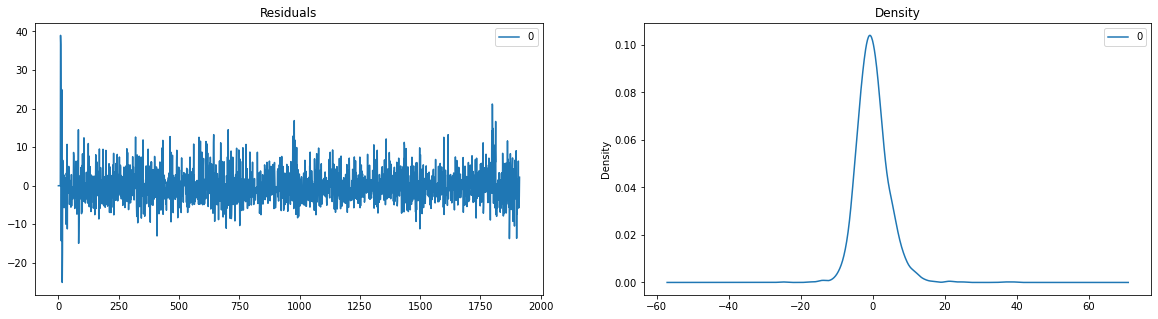

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid() )
fig, ax = plt.subplots(1,2,figsize =(20,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

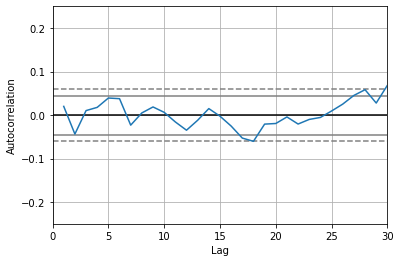

In [ ]:

autocorrelation_plot(residuals)
plt.xlim(0,30)
plt.ylim(-0.25,.25)
plt.show()


In [ ]:
(rmsse8+rmsse9+rmsse10)/3

0.7619856798257824

In [ ]:
rmsse_arima= np.array([rmsse1,rmsse2,rmsse3, rmsse4,rmsse5,rmsse6,rmsse7,rmsse8,rmsse9,rmsse10])

In [ ]:
np.round(rmsse_arima,4)

array([0.6702, 1.0523, 0.6639, 0.5996, 0.6072, 0.4888, 0.4675, 0.6742,
       1.0332, 0.5785])

# SES

In [ ]:
rmsse_ses = []
for i in range(10):
    fit = SimpleExpSmoothing(train_val.iloc[i,2:].values).fit()
    ses_forecast = fit.forecast(28)
    rmsse_ses.append( rmsse(ses_forecast, train_val.iloc[i,2:].values, test.iloc[i,:].values, 'test'))



In [ ]:
np.round(rmsse_ses,4)

array([0.6698, 0.9582, 0.6001, 0.6715, 0.7427, 0.5236, 0.495 , 0.7351,
       1.061 , 0.6474])